<h2> Importando librarys necessárias </h2>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def plot(x,y):
    fig, ax = plt.subplots()
    ax.plot(x, y)

    ax.set(xlabel='input(n)', ylabel='value',
           title='Temporal Series')
    ax.grid()
    plt.show()


<h3> Criando e plotando a serie temporal </h3>

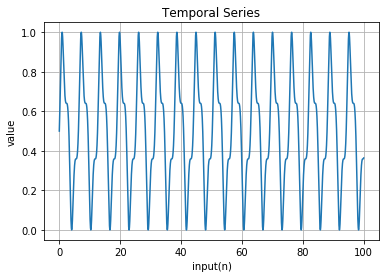

In [25]:
n = np.arange(0.0, 100, 0.01)
    
temporal_series = (1 + np.sin(n + np.sin(n)**2)) ** 1/2

plot(n, temporal_series)

In [101]:
data = list(zip(n, np.sin(n)))
data2 = n.reshape(-1, 1)

In [102]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, temporal_series, test_size=0.5, random_state=2, shuffle=False)

<h2> Funções úteis </h2>

In [103]:
# função para mostrar predicões em cima de um modelo de predição

def evaluate(model, t_x, t_y):
    predicted_dataframe = pd.DataFrame( { "Certo": t_y, "Predito" : model.predict( t_x ) } )
    predicted_dataframe['Residual_error'] = predicted_dataframe.Certo - predicted_dataframe.Predito
    return predicted_dataframe

# função para metricas MAE (Mean Average Error ) e RMSE (Root Mean Square Error )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def print_metrics(predicted_dataframe):
    rmse = mean_squared_error(predicted_dataframe.Certo, predicted_dataframe.Predito)
    mae = mean_absolute_error(predicted_dataframe.Certo, predicted_dataframe.Predito)
    print("RMSE: ", rmse, " : ", "MAE: ", mae)


<h2> MLPRegressor </h2>

In [104]:
from sklearn.neural_network import MLPRegressor

MLP_1 = MLPRegressor(hidden_layer_sizes=(6, 12, 25, 50, 25, 12, 6, 3),
                    activation='tanh',
                    max_iter=200,
                    verbose=True,
                    early_stopping=True)
MLP_1.fit(train_X, train_y)

Iteration 1, loss = 0.11109810
Validation score: -0.251452
Iteration 2, loss = 0.04255149
Validation score: -0.012450
Iteration 3, loss = 0.04006905
Validation score: -0.003577
Iteration 4, loss = 0.03990371
Validation score: -0.003075
Iteration 5, loss = 0.03978589
Validation score: -0.000386
Iteration 6, loss = 0.03966518
Validation score: 0.003326
Iteration 7, loss = 0.03953829
Validation score: 0.008372
Iteration 8, loss = 0.03934390
Validation score: 0.013447
Iteration 9, loss = 0.03907512
Validation score: 0.023689
Iteration 10, loss = 0.03854292
Validation score: 0.041611
Iteration 11, loss = 0.03704466
Validation score: 0.125414
Iteration 12, loss = 0.02449126
Validation score: 0.738867
Iteration 13, loss = 0.00874435
Validation score: 0.789788
Iteration 14, loss = 0.00745958
Validation score: 0.805232
Iteration 15, loss = 0.00732254
Validation score: 0.807061
Iteration 16, loss = 0.00728166
Validation score: 0.810285
Iteration 17, loss = 0.00719067
Validation score: 0.808899
I

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(6, 12, 25, 50, 25, 12, 6, 3),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [105]:
mlp_1_df = evaluate(MLP_1, test_X, test_y)
mlp_1_df.head()

,Certo,Predito,Residual_error
0,0.402311,0.360604,0.041708
1,0.404776,0.364642,0.040134
2,0.407328,0.368731,0.038597
3,0.409970,0.372870,0.037099
4,0.412702,0.377059,0.035643


In [106]:
print_metrics(mlp_1_df)

('RMSE: ', 0.014707154952776068, ' : ', 'MAE: ', 0.10353272396773656)


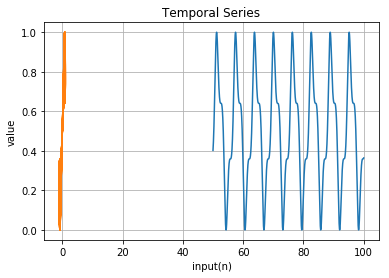

In [107]:
plot(test_X,test_y)

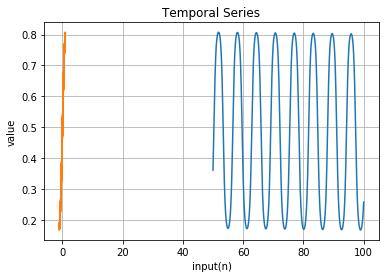

In [108]:
plot(test_X, mlp_1_df.Predito)

<h2> Predizendo o próximo passo <h2>

In [109]:
n_next1 = np.arange(100, 101, 0.01)
t_next1 = (1 + np.sin(n_next1 + np.sin(n_next1)**2)) ** 1/2
data_next1 = list(zip(n_next1, np.sin(n_next1)))

n1_df = evaluate(MLP_1, data_next1, t_next1)
n1_df.head()

,Certo,Predito,Residual_error
0,0.364439,0.259577,0.104862
1,0.365073,0.262010,0.103063
2,0.365755,0.264491,0.101264
3,0.366488,0.267020,0.099468
4,0.367273,0.269599,0.097674


In [110]:
print_metrics(n1_df)

('RMSE: ', 0.005697296603739955, ' : ', 'MAE: ', 0.07072175969616323)


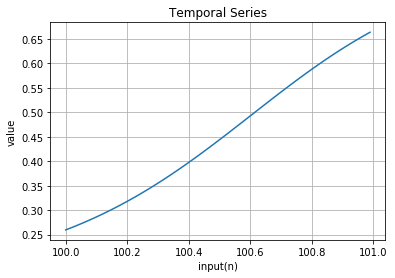

In [111]:
# plot do que foi previsto
plot(n_next1, MLP_1.predict(data_next1))

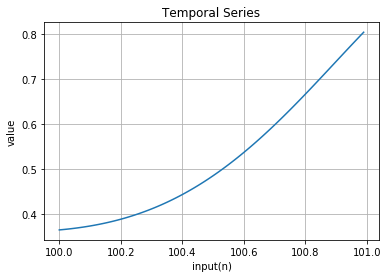

In [112]:
# plot do dado certo
plot(n_next1, t_next1)

<h2>Predizendo os próximos 10 passos</h2>

In [113]:
n_next10 = np.arange(100, 110, 0.01)
t_next10 = (1 + np.sin(n_next10 + np.sin(n_next10)**2)) ** 1/2
data_next10 = list(zip(n_next10, np.sin(n_next10)))

n10_df = evaluate(MLP_1, data_next10, t_next10)
n10_df.head()

,Certo,Predito,Residual_error
0,0.364439,0.259577,0.104862
1,0.365073,0.262010,0.103063
2,0.365755,0.264491,0.101264
3,0.366488,0.267020,0.099468
4,0.367273,0.269599,0.097674


In [114]:
print_metrics(n10_df)

('RMSE: ', 0.01460494399004457, ' : ', 'MAE: ', 0.10317973097618381)


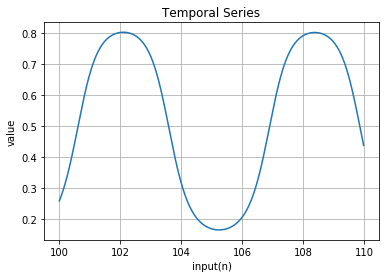

In [115]:
# plot do que foi previsto
plot(n_next10, MLP_1.predict(data_next10))

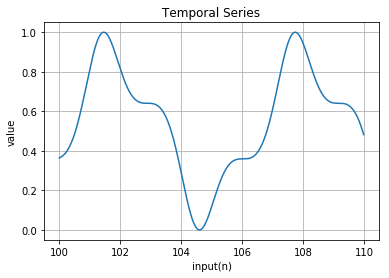

In [116]:
# plot do dado correto
plot(n_next10, t_next10)

<h2>Predizendo os próximos 100 passos</h2>

In [117]:
n_next100 = np.arange(100, 200, 0.01)
t_next100 = (1 + np.sin(n_next100 + np.sin(n_next100)**2)) ** 1/2
data_next100 = list(zip(n_next100, np.sin(n_next100)))

n100_df = evaluate(MLP_1, data_next100, t_next100)
n100_df.head()

,Certo,Predito,Residual_error
0,0.364439,0.259577,0.104862
1,0.365073,0.262010,0.103063
2,0.365755,0.264491,0.101264
3,0.366488,0.267020,0.099468
4,0.367273,0.269599,0.097674


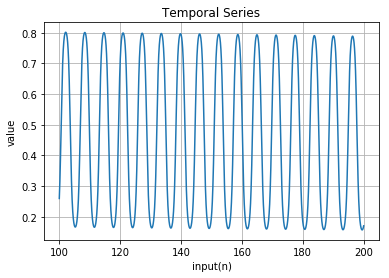

In [118]:
#plot do que foi previsto
plot(n_next100, MLP_1.predict(data_next100))

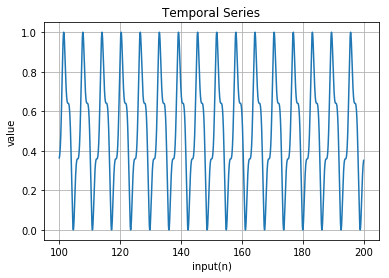

In [119]:
# plot do dado correto
plot(n_next100, t_next100)